# Jensen inequality

## Back from the beginning (again)
To know how we got here, let's recap everything since the beginning. I know, it's a lot of repetition, but I find it helps cement the concepts in ones mind. If you don't agree, skip to the next section.


### The linear model
Let's write down again our model:

$$y = \bold{X}\bold{\beta} + \epsilon$$

Where:
- $y= \begin{bmatrix}y_1\\y_2\\...\end{bmatrix}$: is a vector containing each data point we are trying to model (i.e. penguin weight)
- $\bold{X}= \begin{bmatrix}x_{0, 1},\ x_{1, 1},\ ...\\x_{0, 2},\ x_{1, 2},\ ...\\...,\ ...,\ ...\end{bmatrix}$: is a matrix containing the regressor, also called the **design matrix**. Each column contains all the value of one regressor, each row the value of all regressor associated with each data point. In our example, $x_0$ is the intercept, so it's the same in each row: $x_{0_1} = x_{0_2} = 1$, while $x_1$ is the weight of our penguins, so $x_{1, 1}$ is the weight of the first penguin whose weight is $y_1$ and so on for all our penguins
  
- $\bold{\beta}=\begin{bmatrix}\beta_0\\\beta_1\\...\end{bmatrix}$: the weight of our regressors. We don't know the true values, but can estimate the **observed values** of these parameters that generate a line that fits the data the best, i.e. that minimize the residuals sum of square (RSS) by using OLS (see below). The values found by the OLS are the maximum likelihood estimates (MLE), which means that the likelihood of the data is maximized under these parameter (see likelihood function below)
  
- $\epsilon \sim \mathcal{N}(0, \sigma^2)$: the error term follows a normal distribution of mean 0 and of variance $\sigma^2$. It is an assumption, meaning that if this is not true, we shouldn't use this kind of model.  We assume that the mean of the distribution is 0, which means that negative errors (underestimations) are equally likely as positive errors (overestimations). The $\sigma^2$ on the other hands is not assumed and depends on the data. The variance parameter of the distribution controls its spread, meaning that large $\sigma^2$ implies that large error are more likely compared to when $\sigma^2$ is small. and we can also find the MLE for this parameters, i.e. the value of $\sigma^2$ under which the data are the most likely

In this model, the $y$ and $\bold{X}$ are fixed: it is the data we observed (i.e. measured, collected...). The likelihood of observing these values depends on the value of the parameters $\beta$ and $\sigma^2$. Accordingly, we cvan try to find the $\beta$ and $\sigma^2$ under which the data are most likely, which is what we do when we **fit the model** to the data. The formula for finding the MLE for the $\beta$ is know as the **optimal least square (OLS)**:

$$\hat{\beta} = (\bold{X}^T\bold{X})^-1\bold{X}^Ty$$

This formula looks a bit different to the OLS formulae we saw before for calculating $\hat{\beta_1}$ and $\hat{\beta_0}$, beacuse it is in vector format and it general to calculate all the $\beta$ even if you have more than 2.

The MLE of the variance term of the $\epsilon$ distribution is:

$$\hat{\sigma}^2 = \frac{(y-\bold{X}\bold{\hat{\beta}})^2}{n}$$

In the case of the $\epsilon$ of our model, we don't write that it is equal to the normal distribution, because the error follows a distribution or **probability density function** but it is not equal to it. 

### The Bayes theorem in the case of the linear model
When we ask the question: "Is there a relationship between penguins' fipper lenghts and their weights", we want to draw an inference on the true value of the $\beta$ parameter. We can never know the true value, but we can infer the likelihood of the true value of the parameter given the data, for which we need the Bayes theorem, which states that:

$$P(\Theta|y) = \frac{P(y|\Theta)P(\Theta)}{P(y)}$$

In our specific case, we have:

$$P(\beta, \sigma^2|y) = \frac{P(y|\beta, \sigma^2)P(\beta, \sigma^2)}{P(y)}$$

Where $\beta$ is a vector containing the values of the various beta of our model. So in our penguin example, it contains both $\beta_0$ and $\beta_1$

The likelihood of the data is a multivariate normal distribution (because the error is normally distrubuted around 0), defined as:

$$P(y|\beta, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{n/2}}exp(-\frac{1}{2\sigma^2}(y-\bold{X}\beta)^T)(y-\bold{X}\beta)$$

The prior distribution is:

$$P(\beta, \sigma^2) = P(\beta) \times P(\sigma^2)$$

Where $P(\beta)$ is also a multivariate normal distribution, like so:

$$P(\beta) = \frac{1}{(2\pi)^{p/2}|\mathcal{\Sigma}|^{1/2}}exp(-\frac{1}{2}(\mathcal{\beta} - \mathcal{\mu})^T\Sigma^{-1}(\mathcal{\beta}-\mathcal{\mu}))$$

Where:
- $\mu$ is the prior mean, meaning the value we think is the most likely for each $\beta$ parameter
- $\Sigma$ is the prior variance covariance matrix. Along the diagonal, it contains the variance of the prior distribution of each $\beta$ parameter (i.e. how likely we think the true value of the $\beta$ parameter is really far away from the mean we declared) and off the diagonal is the covariance between two $\beta$ parameters. We should set the off diagonal to 0 if we think that each pair of $\beta$ are independent from each other and to non-zero otherwise. What we mean by $\beta$ not being independent is if you have reasons to believe that observing a certain value of $\beta$ for one parameter is likely to result in another $\beta$ having a larger or smaller value (depending on the sign of the covariance)

And $P(\sigma^2)$ is:

$$P(\sigma^2) = \frac{b^\alpha}{\Gamma(\alpha)}(\sigma^2)^{-\alpha-1}exp(-\frac{b}{\sigma^2})$$

## We can't compute the marginal likelihood...
The reason the book isn't finished already is because we have a problem: we can't compute the marginal likelihood. The marginal likelihood is:

$$P(y) = \int P(y|\bold{\beta}, \sigma^2)P(\bold{\beta}, \sigma^2)d\beta d\sigma^2 = \int P(y|\bold{\beta}, \sigma^2) \times P(\bold{\beta}) \times P(\sigma^2)d\beta d\sigma^2$$

$$P(y) = \int \frac{1}{(2\pi\sigma^2)^{n/2}}exp(-\frac{1}{2\sigma^2}(y-\bold{X}\beta)^T)(y-\bold{X}\beta) \times  \frac{1}{(2\pi)^{p/2}|\mathcal{\Sigma}|^{1/2}}exp(-\frac{1}{2}(\mathcal{\beta} - \mathcal{\mu})^T\Sigma^{-1}(\mathcal{\beta}-\mathcal{\mu})) \times \frac{b^\alpha}{\Gamma(\alpha)}(\sigma^2)^{-\alpha-1}exp(-\frac{b}{\sigma^2})\ d\beta d\sigma^2$$


The marginal likelihood requires to integrate over all possible values of $\beta$ and $\sigma$, which is impossible because there is literally an infinity of possible values. This is a fact, we have to accept it, and the following will not be about figuring out a way to make this unsolvable equation solvable.

Instead of calculating the marginal likelihood, maybe we can calculate something else that's close enough and has a close form solution. One thing that is important to remember before we see what that thing would be is to remember that while the marginal likelihood has a complex formulae, it still returns a single value for each possible combination of $\beta$ and $\sigma$ values, given a set of data $y$ and our priors, so that for each point in our final posterior distribution which informs us about the likelihood of a particular combination of parameter values is the result of a division between two numbers: the result of the product of the prior and the likelihood at that point, divided by the marginal likelihood. So we need to find another function that also takes in all these parameters and yields a single value as the outcome. 


## ... but we can try to find something that approximate the log of the marginal likelihood

We will use a first trick so that instead of computing the marginal likelihood directly, we compute something else. And as with all good math trick, it doesn't seem very obvious at first why it should help. If it were that obvious, it wouldn't take very smart people to figure it out, and I wouldn't need to write a book about it. 

This trick is kind of a two parter. It makes use of something know as the Jensen inequality. The Jensen inequality says that if a function is concave, then the average between two output values of a function will always be less or equal than the output of that function when the input is the average between the values of $x$ that yielded the two initial values. That sounds a bit complicated, so let's give an example. The logarithmic function is a typical concave function:


C:\Users\alexander.lepauvre\AppData\Local\Temp\ipykernel_13900\149632854.py:5: RuntimeWarning: divide by zero encountered in log
  y = np.log(xs)


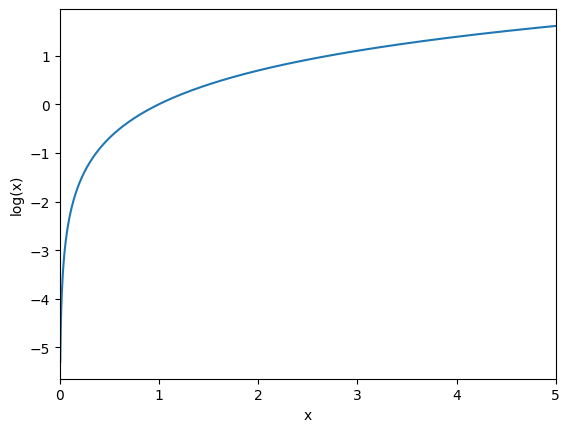

In [16]:
import numpy as np  
import matplotlib.pyplot as plt

xs = np.linspace(0, 5, 1000)
y = np.log(xs)

fig, ax = plt.subplots()
ax.plot(xs, y)
ax.set_xlim(0, 5)
ax.set_ylabel("log(x)")
ax.set_xlabel("x")
plt.show()
plt.close()

The Jensen inequality states the following:

$$\frac{ln(x_1) + ln(x_2)}{2} <>= ln(\frac{ln(x_1) + ln(x_2)}{2})$$

In other words, if we have $x_1=1$ and $x_3$, then we have: 

$$\frac{ln(1) + ln(3)}{2} <= ln(\frac{1 + 3}{2})$$

We can again see that that's the case with code:

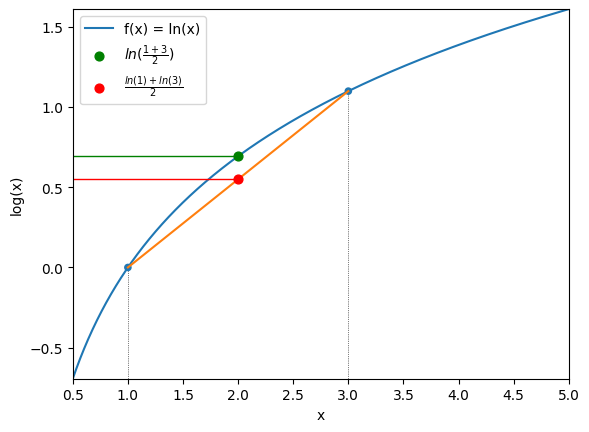

In [55]:
xs = np.linspace(0.5, 5, 1000)
y = np.log(xs)

fig, ax = plt.subplots()
ax.plot(xs, y, label="f(x) = ln(x)")
ax.scatter([1, 3], [np.log(1), np.log(3)], [20, 20], zorder=10)
ax.plot([1, 3], [np.log(1), np.log(3)], [40, 40], 'r', zorder=10)
ax.scatter([np.mean([1, 3])], np.log(np.mean([1, 3])), [40], 'g', zorder=10, label="$ln(\\frac{1 + 3}{2})$")
ax.scatter([np.mean([1, 3])], np.mean(np.log([1, 3])), [40], 'r', zorder=10, label="$\\frac{ln(1) + ln(3)}{2}$")
ax.vlines([1, 3], [-1, -1], [np.log(1), np.log(3)], 'k', linestyles=":", linewidth=0.5)
ax.hlines(np.log(np.mean([1, 3])), 0.5, 2, 'g', linestyles="-", linewidth=1)
ax.hlines(np.mean([np.log(1), np.log(3)]), 0.5, 2, 'r', linestyles="-", linewidth=1)
ax.set_xlim(0.5, 5)
ax.set_ylim(np.log(0.5), np.log(5))
ax.set_ylabel("log(x)")
ax.set_xlabel("x")
plt.legend()
plt.show()
plt.close()

This is just an example with the logarithmic function, but that's true of any concave function. We can express it more generally:

$$\frac{f(x_1) + f(x_2)}{2} <>= f(\frac{x_1 + x_2}{2})$$

In other words, if you to know the value of a concave function at a given point, you know that it is at least as much as 